<a href="https://colab.research.google.com/github/abhilash1910/AI-Geometric-Learning/blob/master/Spherical_Geodesic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geodesics on Spherical Metric Tensor

In this example, we will be looking at how to solve the geodesic equation for a spherical manifold. 
<img src="http://einsteinrelativelyeasy.com/images/generalrelativity/SphericalCoordinates1.png">


The spherical metric is denoted as :
$$ds^2 = R^2 d\theta^{2} + R^2 \sin^2 \theta d\phi^{2}.$$

In polar coordinates,for the Christoffel symbol $\Gamma^{\theta}_{\phi \phi}$  on a sphere of $R$ radius, , $\Gamma^{\theta}_{\phi \phi}$ is independent of $\phi$ and $R$. Considering the geodesic equation: $$\nabla_{\lambda} T^{\mu} = \frac{dT^{\mu}}{d \lambda} + \Gamma^{\mu}_{\kappa \nu} T^{\nu} \frac{dx^{\kappa}}{d \lambda} \ldotp$$ where christoffel symbols are symmetric $\Gamma^{\mu}_{\kappa \nu} = \Gamma^{\mu}_{\nu \kappa}$ and $\lambda$ is an affine parameter, an iterative way to compute approximate geodesic distance is as follows:

- Initializing  $\lambda$ , the $x^{\mu}$  and their derivatives  $dx^{\mu}d\lambda$ and  setting a small step-size  $\Delta\lambda$  by which to increment  $\lambda$  at each step below.
- For n from 0 to number of iterations
  - do until the geodesic has been extended to the desired affine distance
    - calculate  $d^{2}x^{\mu}d\lambda^{2}$  using the geodesic equation.
    - Add  $(d^{2}x^{\mu}d\lambda^{2})\Delta\lambda$ to the currently stored value of $dx^{\mu}d\lambda$ .
    - Add  $(dx^{\mu}d\lambda)\Delta\lambda$ to $x^{\mu}$ .
    - Add  $\Delta\lambda$  to  $\lambda$ .

 
For polar coordinates in a Euclidean plane, one can compute $\Gamma^{r}_{\phi \phi}=-r$ and $\Gamma^{\phi}_{r \phi} = \frac{1}{r}$.
 A proof of the same is provided [here](https://mathworld.wolfram.com/SphericalCoordinates.html).


Lambda values: 0.0001 , Radius values: 1.00000001 ,Phi Values: 0.005729577951308233
Lambda values: 10.000099999990033 , Radius values: 10.050648136911553 ,Phi Values: 84.28341584739329
Lambda values: 20.00009999996673 , Radius values: 20.026354292251334 ,Phi Values: 87.13100835094106
Lambda values: 30.000099999943423 , Radius values: 30.018623826320667 ,Phi Values: 88.08406669353016
Lambda values: 40.000100000204334 , Radius values: 40.015050338441114 ,Phi Values: 88.56102665214073
Lambda values: 50.0001000005363 , Radius values: 50.01314124036141 ,Phi Values: 88.84730254632403
Lambda values: 60.000100000868265 , Radius values: 60.01206466632108 ,Phi Values: 89.0381859690504
Lambda values: 70.00010000120022 , Radius values: 70.01146391702255 ,Phi Values: 89.17454457302267
Lambda values: 80.00010000153219 , Radius values: 80.01116059354467 ,Phi Values: 89.2768197370358
Lambda values: 90.00010000186415 , Radius values: 90.01105556896519 ,Phi Values: 89.35637030041148
Lambda values: 100.0

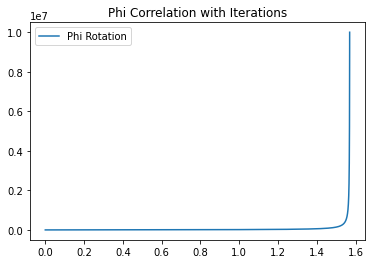

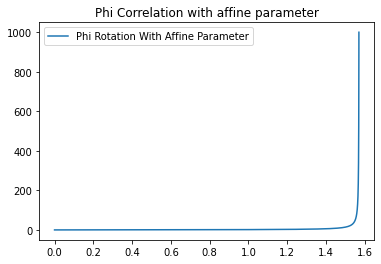

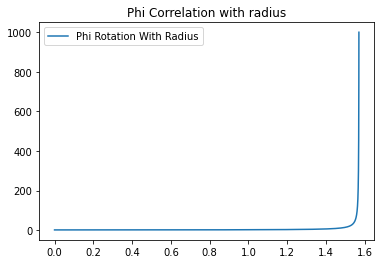

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def spherical_geodesic(iterations,lamda,del_lamda,r,phi,del_r,del_phi,li_phi,li_iter,li_lamda,li_r):
  i=0
  while(lamda<iterations):
    """Incrase the affine parameter"""
    lamda+=del_lamda
    """Christoffel coefficients"""
    chris_g_phiphi=-r
    chris_g_phirphi=(1/r)
    """Compute the acceleration of r and phi"""
    accl_r= -chris_g_phiphi*(del_phi**2)
    accl_phi=-2*chris_g_phirphi*del_r*del_phi
    """Increment the velocity along the flow"""
    del_r+=accl_r*del_lamda
    del_phi+=accl_phi*del_lamda
    r+=del_r*del_lamda
    phi+=del_phi*del_lamda
    li_phi.append(phi)
    li_iter.append(i)
    li_lamda.append(lamda)
    li_r.append(r)
    if i%100000==0:
      deg=phi*180.0/np.pi
      print(f"Lambda values: {lamda} , Radius values: {r} ,Phi Values: {deg}")
    i+=1

if __name__=='__main__':
  iterations=1000
  lamda=0
  del_lamda=0.0001
  r=1 
  phi=0
  del_r=0
  del_phi=1
  li_phi,li_iter,li_lamda,li_r=[],[],[],[]
  spherical_geodesic(iterations,lamda,del_lamda,r,phi,del_r,del_phi,li_phi,li_iter,li_lamda,li_r)
  plt.plot(li_phi,li_iter,label='Phi Rotation')
  plt.legend()
  plt.title('Phi Correlation with Iterations')
  plt.show()
  print("=========================")
  plt.plot(li_phi,li_lamda,label='Phi Rotation With Affine Parameter')
  plt.legend()
  plt.title('Phi Correlation with affine parameter')
  plt.show()
  print("=========================")
  plt.plot(li_phi,li_r,label='Phi Rotation With Radius')
  plt.legend()
  plt.title('Phi Correlation with radius')
  plt.show()
  print("=========================")
  